In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [39]:
trainpath='D://Level_3//Second_Term//Selected_2//datasets//dataset_2//Face Images//'
testpath='D://Level_3//Second_Term//Selected_2//datasets//dataset_2//Face Images//'

In [40]:
for folder in  os.listdir(trainpath + 'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 0 in folder .DS_Store
For training data , found 15 in folder face1
For training data , found 20 in folder face10
For training data , found 16 in folder face11
For training data , found 14 in folder face12
For training data , found 13 in folder face13
For training data , found 12 in folder face14
For training data , found 15 in folder face15
For training data , found 17 in folder face16
For training data , found 15 in folder face2
For training data , found 14 in folder face3
For training data , found 17 in folder face4
For training data , found 16 in folder face5
For training data , found 16 in folder face6
For training data , found 14 in folder face7
For training data , found 14 in folder face8
For training data , found 16 in folder face9


In [41]:
for folder in  os.listdir(testpath + 'Final Testing Images') : 
    files = gb.glob(pathname= str( testpath +'Final Testing Images//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 0 in folder .DS_Store
For testing data , found 4 in folder face1
For testing data , found 4 in folder face10
For testing data , found 4 in folder face11
For testing data , found 4 in folder face12
For testing data , found 4 in folder face13
For testing data , found 4 in folder face14
For testing data , found 4 in folder face15
For testing data , found 4 in folder face16
For testing data , found 4 in folder face2
For testing data , found 4 in folder face3
For testing data , found 4 in folder face4
For testing data , found 4 in folder face5
For testing data , found 4 in folder face6
For testing data , found 4 in folder face7
For testing data , found 4 in folder face8
For testing data , found 4 in folder face9


In [42]:
size = []
for folder in  os.listdir(trainpath + 'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() # num of same values

(311, 311, 3)    9
(316, 316, 3)    8
(323, 323, 3)    8
(313, 313, 3)    8
(326, 326, 3)    8
                ..
(301, 301, 3)    1
(338, 338, 3)    1
(278, 278, 3)    1
(342, 342, 3)    1
(368, 368, 3)    1
Length: 83, dtype: int64

In [43]:
size = []
for folder in  os.listdir(testpath + 'Final Testing Images') : 
    files = gb.glob(pathname= str( testpath +'Final Testing Images//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() # num of same values

(299, 299, 3)    4
(313, 313, 3)    4
(310, 310, 3)    3
(307, 307, 3)    3
(325, 325, 3)    2
(298, 298, 3)    2
(305, 305, 3)    2
(323, 323, 3)    2
(312, 312, 3)    2
(322, 322, 3)    2
(341, 341, 3)    2
(303, 303, 3)    2
(336, 336, 3)    2
(311, 311, 3)    2
(316, 316, 3)    2
(288, 288, 3)    2
(315, 315, 3)    2
(354, 354, 3)    1
(271, 271, 3)    1
(353, 353, 3)    1
(317, 317, 3)    1
(287, 287, 3)    1
(309, 309, 3)    1
(335, 335, 3)    1
(327, 327, 3)    1
(350, 350, 3)    1
(329, 329, 3)    1
(300, 300, 3)    1
(320, 320, 3)    1
(368, 368, 3)    1
(346, 346, 3)    1
(308, 308, 3)    1
(318, 318, 3)    1
(358, 358, 3)    1
(262, 262, 3)    1
(345, 345, 3)    1
(326, 326, 3)    1
(319, 319, 3)    1
(277, 277, 3)    1
(343, 343, 3)    1
(333, 333, 3)    1
dtype: int64

In [44]:
code = {'face1':0 ,'face10':1,'face11':2,'face12':3,'face13':4,'face14':5,'face15': 6,'face16': 7,'face2': 8,'face3': 9,'face4': 10,'face5': 11,'face6': 12,'face7': 13,'face8': 14,'face9': 15}

def getcode(n) :  # n is the input
    for x , y in code.items() : 
        if n == y : 
            return x   

In [58]:
s=100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'Final Training Images') : 
    files = gb.glob(pathname= str( trainpath +'Final Training Images//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [59]:
print(f'we have {len(X_train)} items in X_train')

we have 244 items in X_train


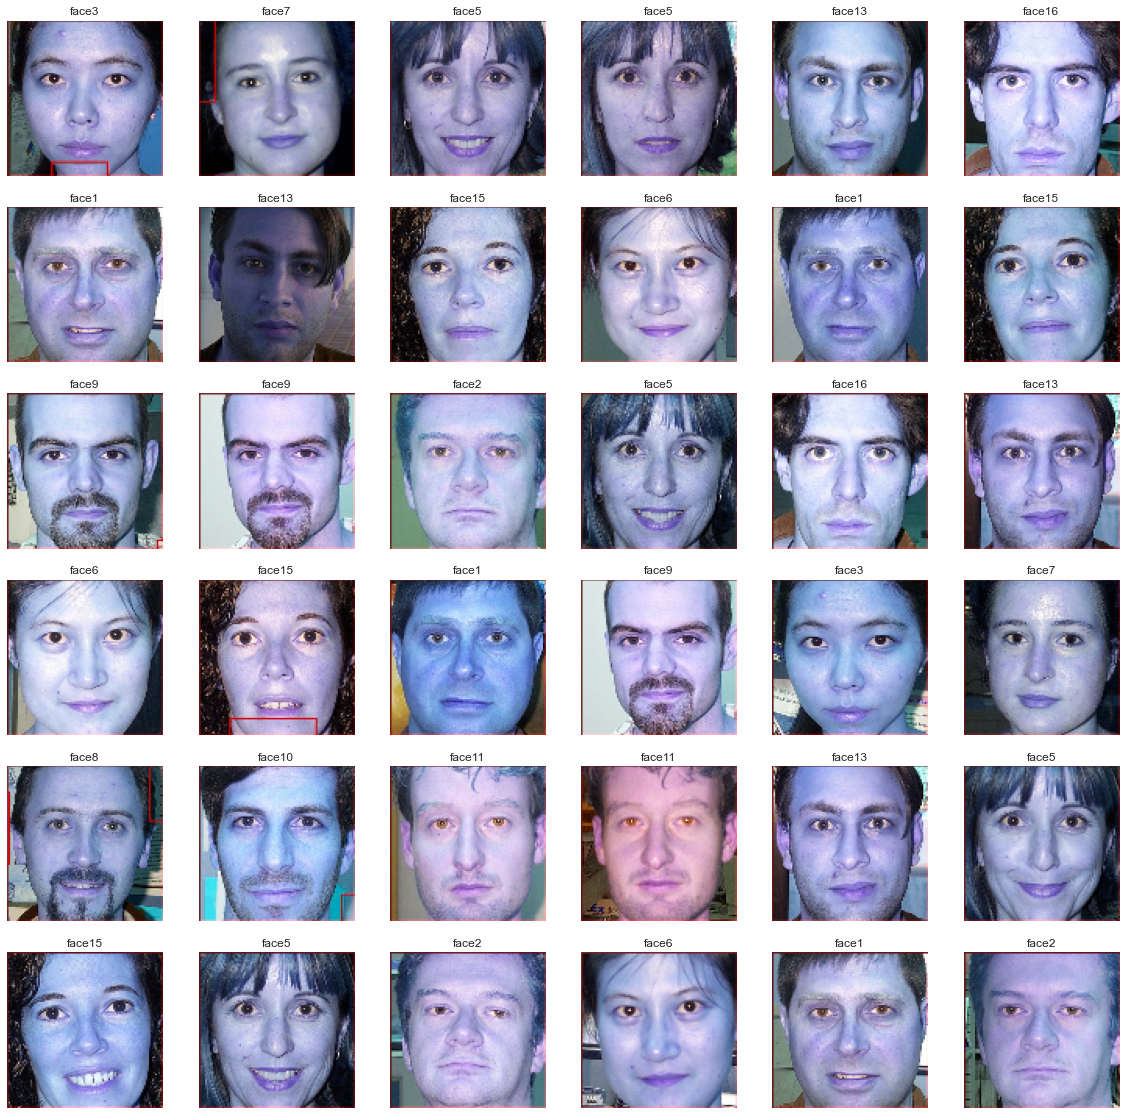

In [60]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [61]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Final Testing Images') : 
    files = gb.glob(pathname= str(testpath + 'Final Testing Images//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [62]:
print(f'we have {len(X_test)} items in X_test')

we have 64 items in X_test


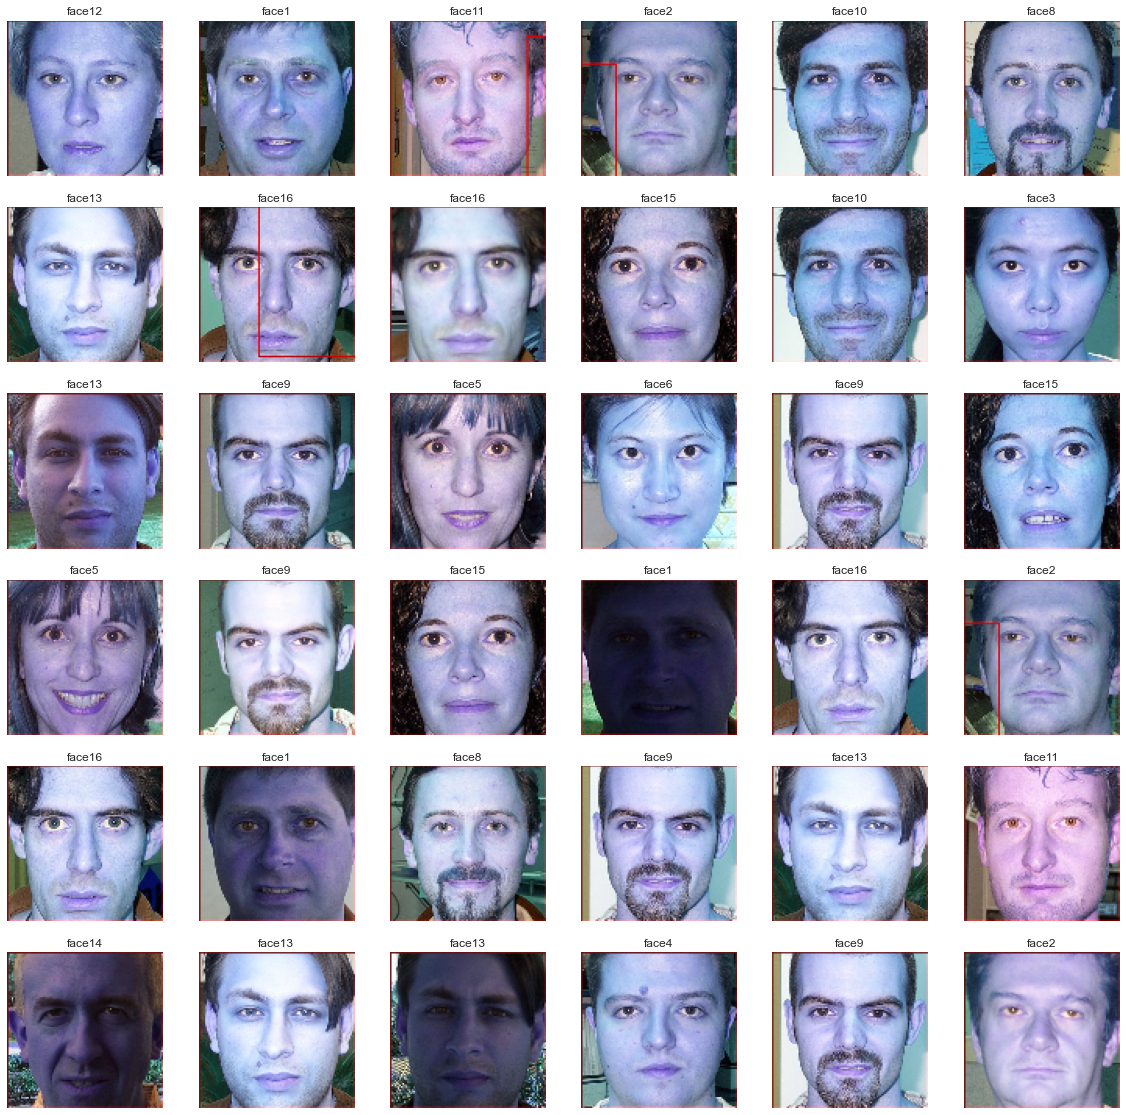

In [63]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [64]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (244, 100, 100, 3)
X_test shape  is (64, 100, 100, 3)
y_train shape  is (244,)
y_test shape  is (64,)


In [65]:
from keras.layers import Dense

KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(s,s,3)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(s,kernel_size=(5,5), strides=(1,1), activation='relu'),    
        keras.layers.MaxPool2D(2,2),
        keras.layers.Flatten() , 
        keras.layers.Dense(s, activation='relu'),
        keras.layers.Dense(16,activation='softmax') ,     
        ])


In [66]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 100)       80100     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 22, 100)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 48400)             0         
                                                                 
 dense_8 (Dense)             (Non

In [68]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,verbose=1, validation_steps=10)

Epoch 1/10
8/8 [==============================] - 2s 265ms/step - loss: 207.9410 - accuracy: 0.1148
Epoch 2/10
8/8 [==============================] - 2s 261ms/step - loss: 1.4982 - accuracy: 0.5615
Epoch 3/10
8/8 [==============================] - 2s 273ms/step - loss: 0.8125 - accuracy: 0.8033
Epoch 4/10
8/8 [==============================] - 2s 265ms/step - loss: 0.2606 - accuracy: 0.9344
Epoch 5/10
8/8 [==============================] - 2s 265ms/step - loss: 1.0834 - accuracy: 0.7828
Epoch 6/10
8/8 [==============================] - 2s 268ms/step - loss: 0.3862 - accuracy: 0.8852
Epoch 7/10
8/8 [==============================] - 2s 273ms/step - loss: 0.2499 - accuracy: 0.9262
Epoch 8/10
8/8 [==============================] - 2s 267ms/step - loss: 0.5664 - accuracy: 0.8525
Epoch 9/10
8/8 [==============================] - 2s 281ms/step - loss: 0.2212 - accuracy: 0.9508
Epoch 10/10
8/8 [==============================] - 2s 260ms/step - loss: 0.0467 - accuracy: 0.9836


In [69]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2/2 [==============================] - 1s 61ms/step - loss: 0.1510 - accuracy: 0.9219
Test Loss is 0.1509629786014557
Test Accuracy is 0.921875


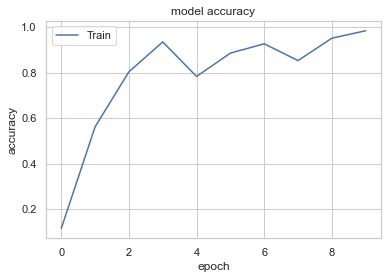

In [70]:
# summarize history for accuracy
plt.plot(ThisModel.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

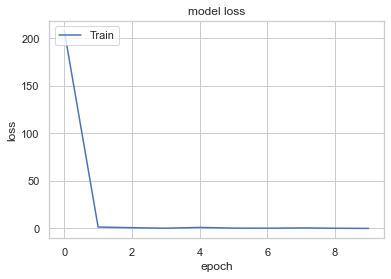

In [71]:
# summarize history for loss
plt.plot(ThisModel.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()